In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import re
from ast import literal_eval

In [36]:
current_path = os.getcwd()
current_path

'/Users/lesliekim/Desktop/db_final'

In [37]:
path = current_path 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame

,journal,volume,article_name,authors,number_authors,year,topics,citedby_articles,citedby_cases,citedby_ALI,authors_last,authors_first,authors_gender,prop_female,prop_male
0,Wake Forest Law Review,35,The Conundrum of Executive Compensation,"['Loewenstein, Mark J.']",1,2000,"['Business and the Law', 'Securities Law', 'Ec...",48.0,0.0,0.0,Loewenstein,Mark,male,0.00330710087799073,0.996692899122009
1,Wake Forest Law Review,35,Inherent Tensions between Home Rule and Region...,"['Alexander, Frank S.']",1,2000,"['Home Rule', 'Government (General)', 'State a...",14.0,0.0,0.0,Alexander,Frank,male,0.00503052572321308,0.994969474276787
2,Wake Forest Law Review,35,A Right or a Privilege: Constitutional Protect...,"['Beyer, Elizabeth Larson']",1,2000,"['Constitutional Law, Generally', 'Immigration...",3.0,0.0,0.0,Beyer,Elizabeth,female,0.996856941491036,0.00314305850896356
3,Wake Forest Law Review,35,Pragmatic Textualism and the Limits of Statuto...,"['Fruehwald, Scott']",1,2000,"['Legislation', 'Statutory Interpretation', 'C...",14.0,0.0,0.0,Fruehwald,Scott,male,0.00336617331404151,0.996633826685958
4,Wake Forest Law Review,35,A Minimum Interest Approach to Personal Jurisd...,"['Heiser, Walter W.']",1,2000,"['Jurisdiction', 'Due Process', 'Constitutiona...",36.0,1.0,0.0,Heiser,Walter,male,0.00579234014050252,0.994207659859497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75648,SMU Law Review,75,Tribute to Professor Bill Dorsaneo,"['Thornburg, Elizabeth G.']",1,2022,"['Criminal Procedure', 'Criminal Law and Proce...",NaN,NaN,NaN,Thornburg,Elizabeth,female,0.996856941491036,0.00314305850896356
75649,SMU Law Review,75,"William V. Dorsaneo, III","['Hecht, Nathan L.']",1,2022,"['Civil Procedure', 'Civil Law', 'Sanctions', ...",0.0,0.0,0.0,Hecht,Nathan,male,0.00313813161851516,0.996861868381485
75650,SMU Law Review,75,Integrated Nonmarital Property Rights,"['Spitko, E. Gary']",1,2022,"['Domestic Relations', 'Marital Property', 'Do...",0.0,0.0,0.0,Spitko,Gary,male,0.00363382945890786,0.996366170541092
75651,SMU Law Review,75,Solving the Procedural Puzzles of the Texas He...,"['Rhodes, Charles W.', 'Wasserman, Howard M.']",2,2022,"['Evidence', 'Intellectual Property Law', 'Rac...",0.0,0.0,0.0,"Rhodes, Wasserman","Charles, Howard","male, male","0.00515232659099748, 0.00483254663969431","0.994847673409002, 0.995167453360306"


In [38]:
## 1. Top Topics by Journal (Piechart)

In [39]:
df = frame.groupby('journal')

In [40]:
df.get_group('Wake Forest Law Review')['topics']

0      ['Business and the Law', 'Securities Law', 'Ec...
1      ['Home Rule', 'Government (General)', 'State a...
2      ['Constitutional Law, Generally', 'Immigration...
3      ['Legislation', 'Statutory Interpretation', 'C...
4      ['Jurisdiction', 'Due Process', 'Constitutiona...
                             ...                        
751                                                  NaN
752                                                  NaN
753                                                  NaN
754                                                  NaN
755                                                  NaN
Name: topics, Length: 756, dtype: object

In [41]:
import itertools

In [42]:
gp = df.groups.keys()

In [47]:
rows = 2
cols = 3
for g in gp:
    filtered_list = df.get_group(g)['topics']
    filtered_list = filtered_list[filtered_list.notna()].apply(literal_eval)
    cnt = pd.Series(sum([item for item in filtered_list], [])).value_counts().head(10)
    #plt.pie(df.loc[df.index[row],:], labels=df.columns)
    #cnt.plot.pie(subplots=True, figsize=(2, 2))
    print(g, ':\n', cnt)


Alabama Law Review :
 Constitutional Law, Generally    174
Legal Practice and Procedure     145
Criminal Law and Procedure        93
Jurisprudence                     87
Courts                            82
Legal History                     75
Law and Society                   70
Business and the Law              69
Judges                            69
Torts                             66
dtype: int64
American University Law Review :
 Constitutional Law, Generally    344
Legal Practice and Procedure     310
Intellectual Property Law        258
Criminal Law and Procedure       222
Courts                           176
Business and the Law             164
First Amendment                  132
Jurisdiction                     126
Government (General)             124
International Law                118
dtype: int64
Arizona Law Review :
 Constitutional Law, Generally    144
Legal Practice and Procedure     125
Criminal Law and Procedure       103
Torts                             89
Courts  

Harvard Law Review :
 Constitutional Law, Generally    196
Jurisprudence                    116
Politics (General)               100
Criminal Law and Procedure        82
Law and Society                   77
Courts                            76
Legal History                     75
Judges                            73
Business and the Law              59
Biography                         57
dtype: int64
Hastings Law Journal :
 Constitutional Law, Generally       193
Legal Practice and Procedure        142
Criminal Law and Procedure          123
Intellectual Property Law           109
Jurisprudence                        99
Courts                               91
Evidence                             87
Science, Technology, and the Law     82
Business and the Law                 81
Law and Society                      73
dtype: int64
Hofstra Law Review :
 Legal Profession                 206
Professional Ethics in Law       186
Criminal Law and Procedure       169
Legal Practice and Proced

Tulane Law Review :
 Legal Practice and Procedure     201
Constitutional Law, Generally    173
Torts                            142
Jurisprudence                    125
Criminal Law and Procedure       108
Comparative and Foreign Law       98
Contracts                         92
Business and the Law              90
Courts                            85
International Law                 82
dtype: int64
U.C. Davis Law Review :
 Constitutional Law, Generally    189
Intellectual Property Law        155
Legal Practice and Procedure     128
Criminal Law and Procedure       128
Law and Society                  103
Business and the Law              99
Courts                            93
Jurisprudence                     92
Civil Rights, Generally           88
Race, Ethnicity, and the Law      66
dtype: int64
UC Irvine Law Review :
 Jurisprudence                    56
Intellectual Property Law        53
Criminal Law and Procedure       46
Law and Society                  46
Legal History       

Washington University Law Review :
 Constitutional Law, Generally    145
Legal Practice and Procedure     142
Criminal Law and Procedure       129
Business and the Law             111
Intellectual Property Law         98
Jurisprudence                     87
Law and Society                   87
Securities Law                    83
Courts                            76
First Amendment                   76
dtype: int64
Washington and Lee Law Review :
 Constitutional Law, Generally    180
Criminal Law and Procedure       150
Legal Practice and Procedure     148
Business and the Law             137
Intellectual Property Law        109
Courts                           101
Law and Society                   84
Remedies                          81
Torts                             80
Penology                          79
dtype: int64
Wayne Law Review :
 Constitutional Law, Generally    192
Criminal Law and Procedure       154
Legal Practice and Procedure     117
Property--Personal and Real       

<AxesSubplot:ylabel='None'>

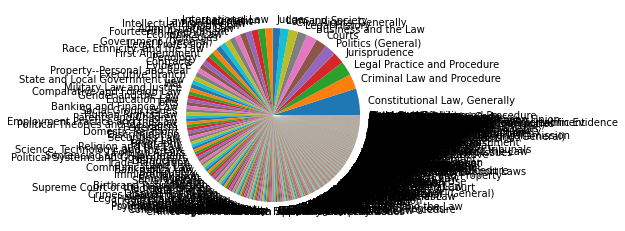

In [28]:
cnt.plot(kind='pie')